### What makes a bestselling fragrance?

#### Summary 

Bestselling fragrances consistently achieve more reviews and more loves on average. However, it is interesting to note that the average and median average rating of each fragrance are comparable for both bestselling and non-bestselling fragrances. 

We also see that bestsellers have higher advertised prices than non-bestsellers. We don't see significant differences in advertised oz or price per oz, and we only see a slightly higher average number of size options available for bestsellers.

Bestsellers tend to have higher prices and tend to have a higher frequency of wood and fruit scents. The pattern of bestselling frequencies by brand indicates that advertising may be driving a significant porportion of bestesellers. This means that any model we build to predict bestsellers will not generalize well to new data. 


In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from myhist import df_hist_grid

In [201]:
#load processed data
df_details = pd.read_csv('~/perfume_proj/data/processed/fragrance_details.csv' )

pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [202]:
df_details.head()

,bestseller,brand,product_name,item_no,5_star,4_star,3_star,2_star,1_star,price,...,warm,spicy|spice,earthy,woody|wood,musk|musky,vanilla,fruit|fruity,sweet,oil,rose
0,True,tom ford,tobacco vanille,1449289,62.0,8.0,8.0,2.0,2.0,235.0,...,1,1,0,1,1,1,1,1,0,0
1,True,chanel,bleu de chanel eau de parfum,1695972,78.0,3.0,0.0,0.0,0.0,95.0,...,1,0,1,1,0,1,0,0,0,0
2,False,dior,sauvage eau de toilette,1739317,248.0,22.0,5.0,2.0,9.0,77.0,...,0,0,0,1,0,0,0,0,0,0
3,True,maison margiela,’replica’ by the fireplace,1788058,326.0,46.0,19.0,14.0,38.0,126.0,...,1,1,0,1,0,1,0,1,1,0
4,False,tom ford,oud wood,1565928,36.0,10.0,3.0,3.0,3.0,605.0,...,1,0,0,1,0,1,0,0,0,1


In [203]:
df_details.columns

Index(['bestseller', 'brand', 'product_name', 'item_no', '5_star', '4_star',
       '3_star', '2_star', '1_star', 'price', 'oz_at_price', 'options', 'sex',
       'type', 'loves', 'reviews', 'dominant_color', 'floral', 'fresh ',
       'warm', 'spicy|spice', 'earthy', 'woody|wood', 'musk|musky', 'vanilla',
       'fruit|fruity', 'sweet', 'oil', 'rose'],
      dtype='object')

In [204]:
#create other categories for brand and type 
df_details.loc[df_details['brand'].isin(
    (df_details['brand'].value_counts()[df_details['brand'].value_counts() <=5]).index), 'brand'] = 'other_brand'
df_details.loc[df_details['type'].isin(
    (df_details['type'].value_counts()[df_details['type'].value_counts()<=20]).index), 'type'] = 'other_type'

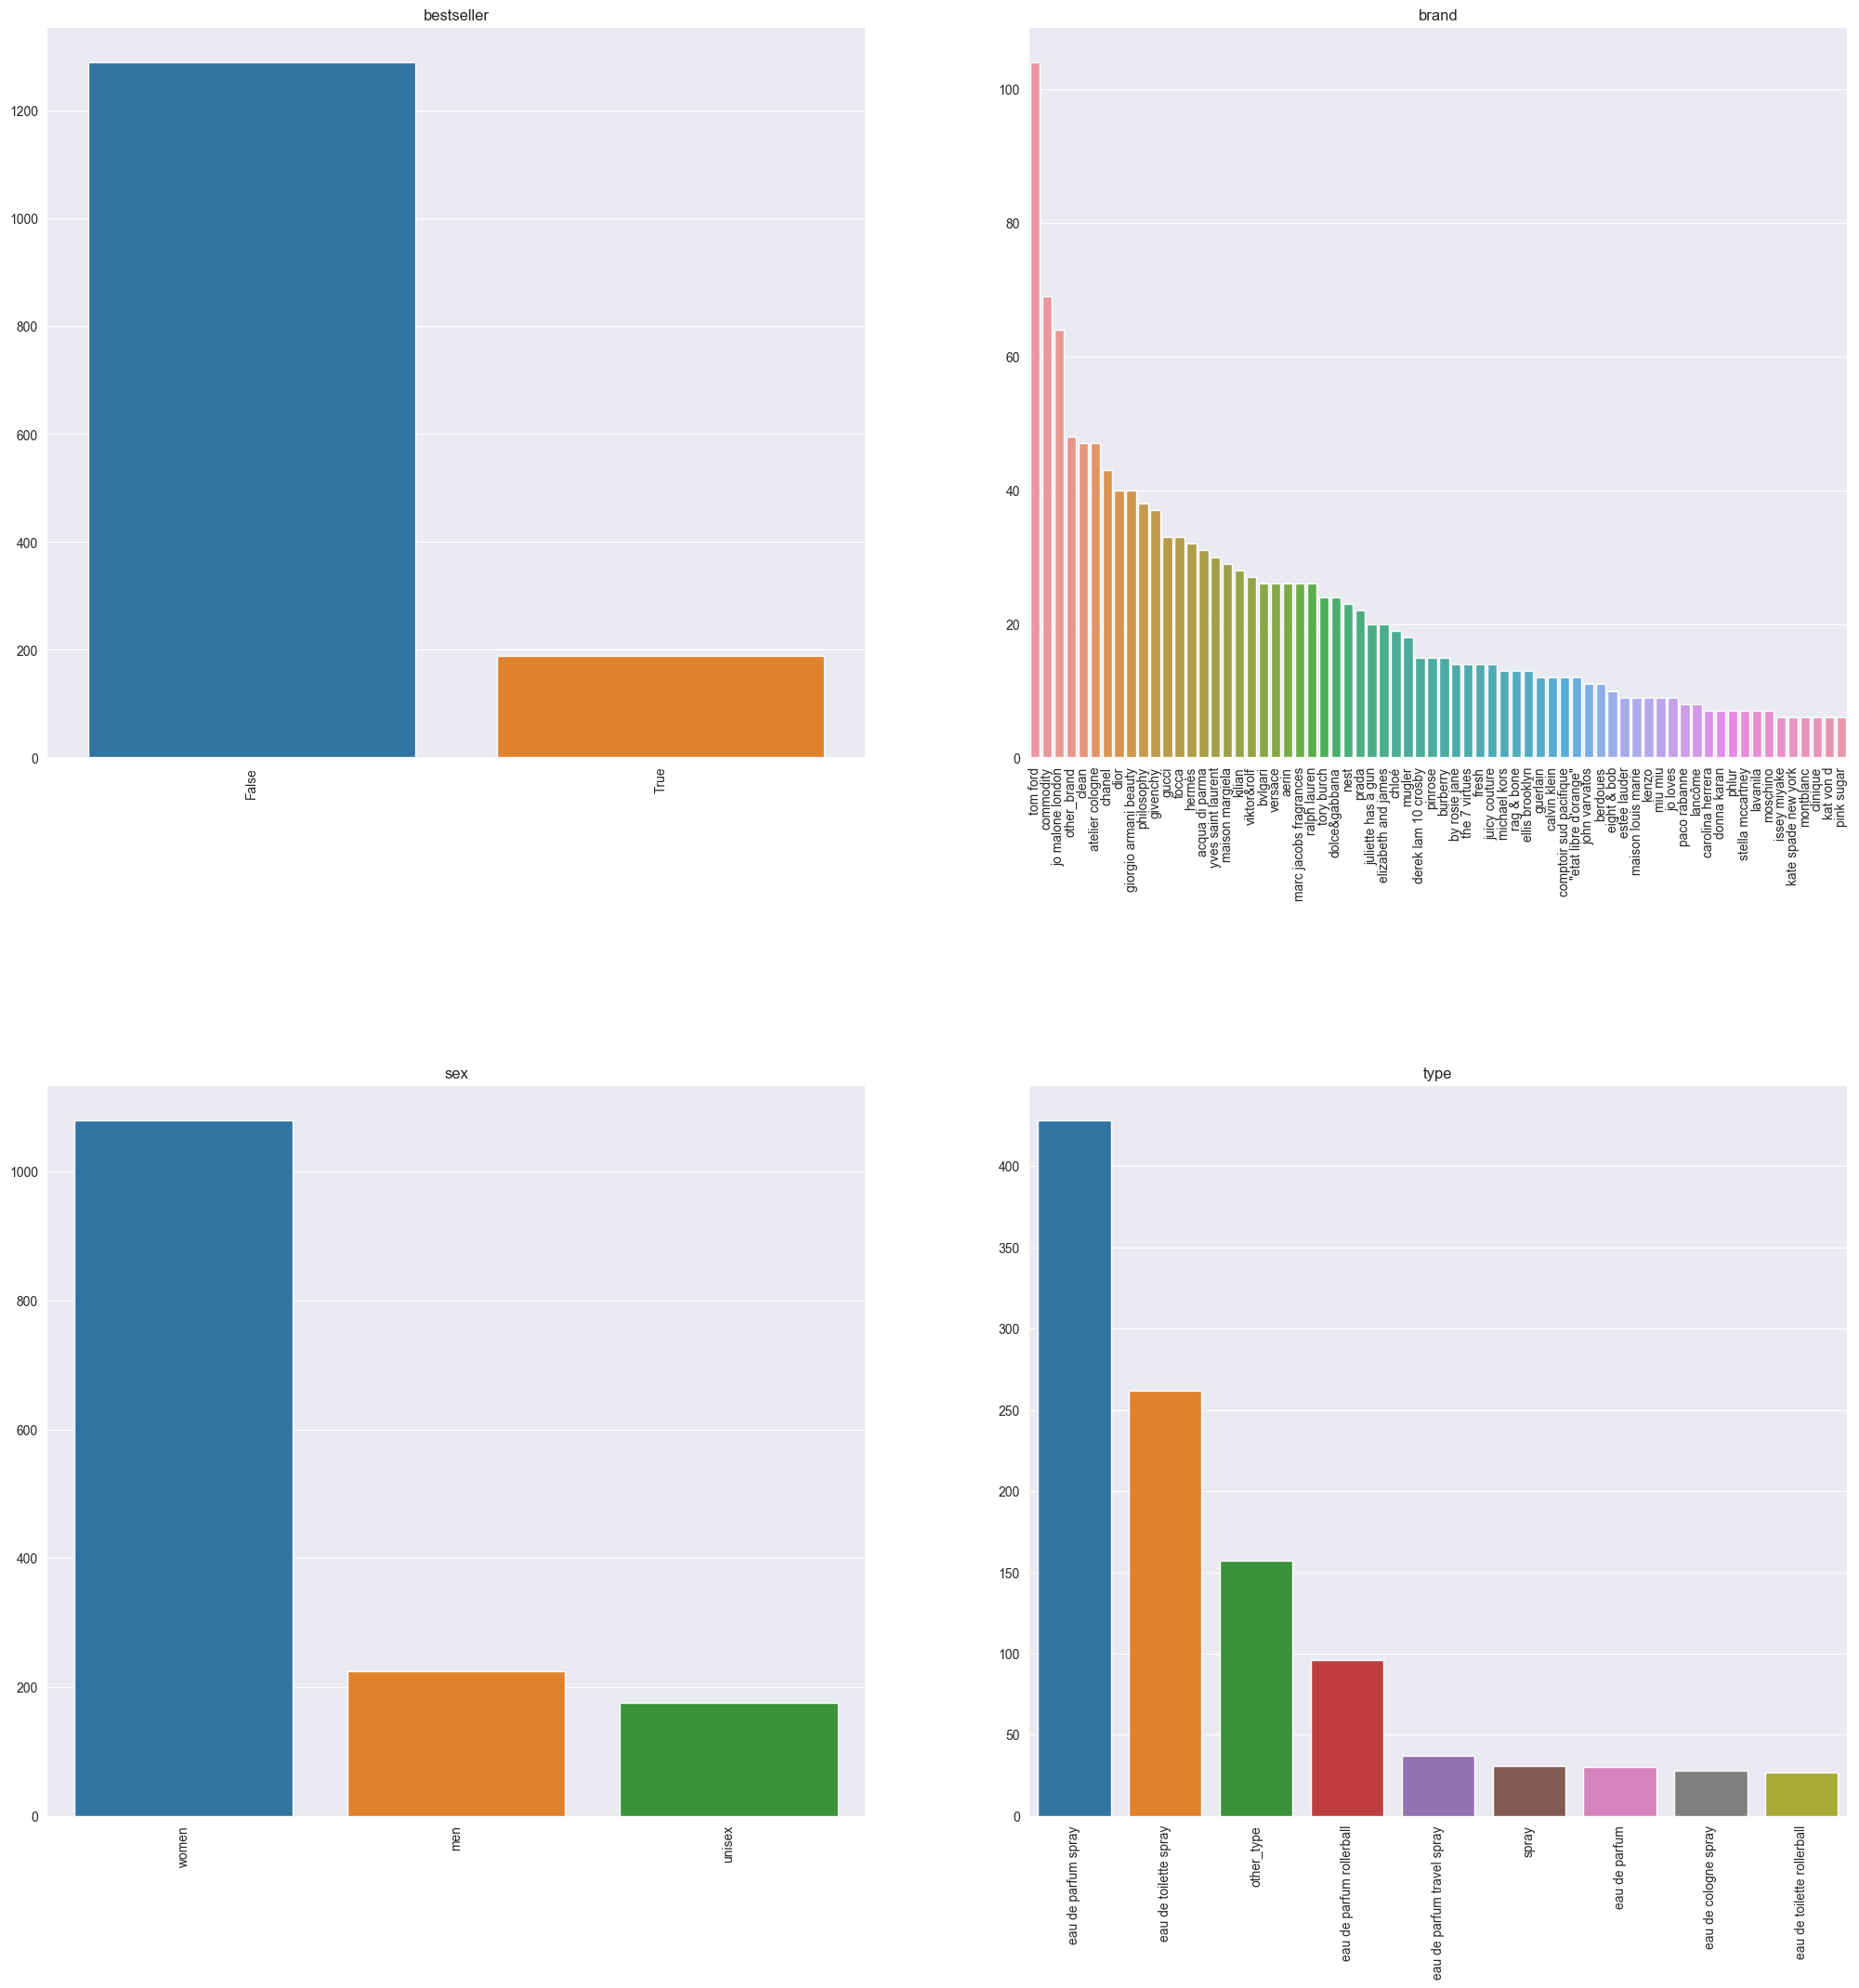

In [205]:
hist_cols = ['bestseller', 'brand', 'sex', 'type']
df_hist = df_details.loc[:, hist_cols]

sns.light_palette("purple")

df_hist_grid(df_hist, 2, 2, figsize=(25, 25));

### Fragrance Ratings

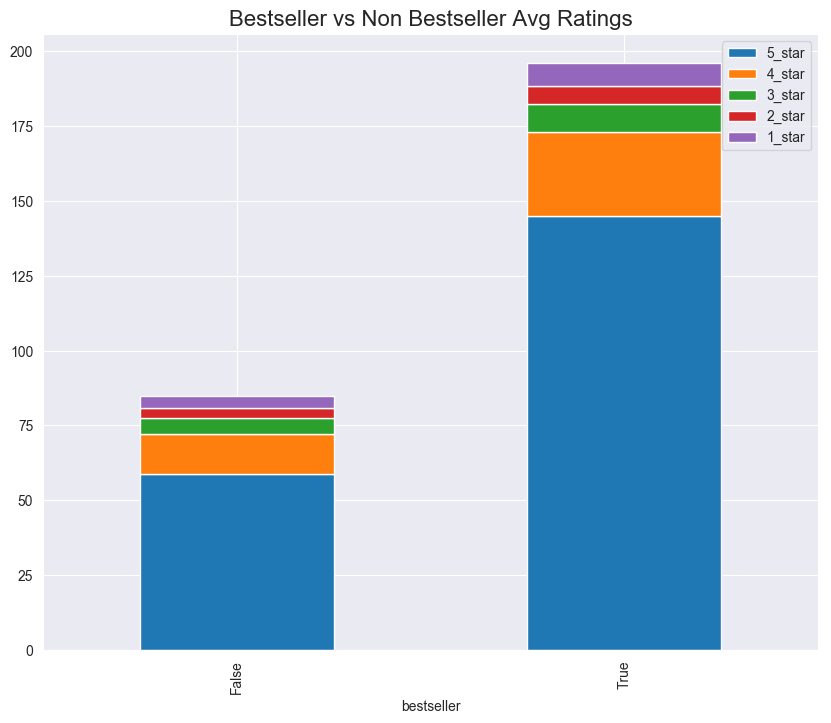

In [206]:
sns.set_style('darkgrid')
ratings = ['5_star', '4_star', '3_star', '2_star', '1_star']

df_details.groupby(['bestseller']).mean().plot(
                                            y= ratings,
                                            kind='bar', stacked=True, figsize=(10,8)
)

plt.title('Bestseller vs Non Bestseller Avg Ratings', fontsize=16);


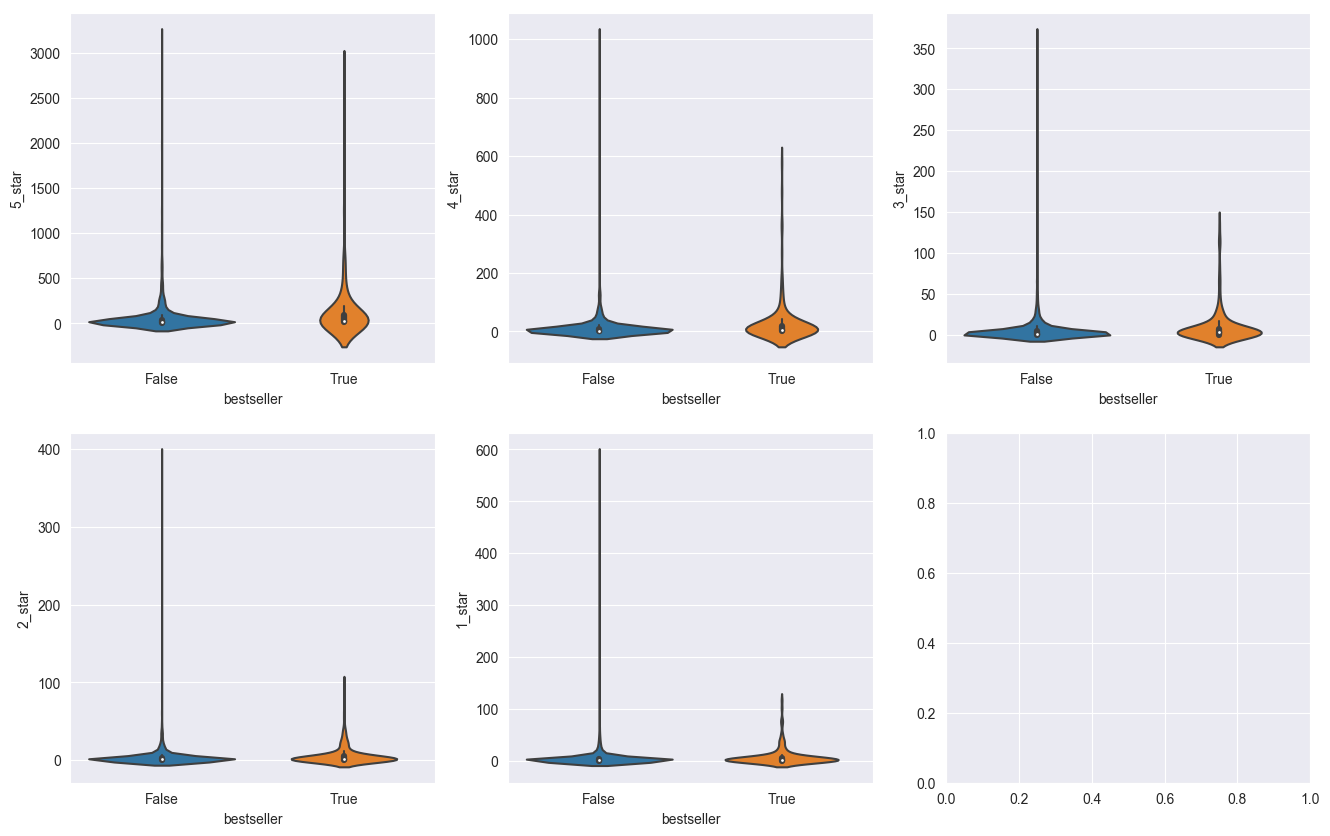

In [207]:
f, axes = plt.subplots(2,3, figsize = (16, 10))

i, j = 0, 0 
for n, star in enumerate(ratings):
    if n==3:
        j=0
        i=1
    sns.violinplot(x ='bestseller', y=star, data = df_details, ax=axes[i, j])
    j+=1

In [208]:
#check validity of ratings
for rating in ratings:
    print(df_details[rating][df_details[rating]<0])

Series([], Name: 5_star, dtype: float64)
Series([], Name: 4_star, dtype: float64)
Series([], Name: 3_star, dtype: float64)
Series([], Name: 2_star, dtype: float64)
Series([], Name: 1_star, dtype: float64)


In [209]:
#number of fragrances with no rating
for rating in ratings:
    print(rating, df_details[rating][df_details[rating] ==0].count())
    
print('total_stars', df_details.reviews[df_details.reviews ==0].count())

5_star 33
4_star 340
3_star 493
2_star 634
1_star 612
total_stars 56


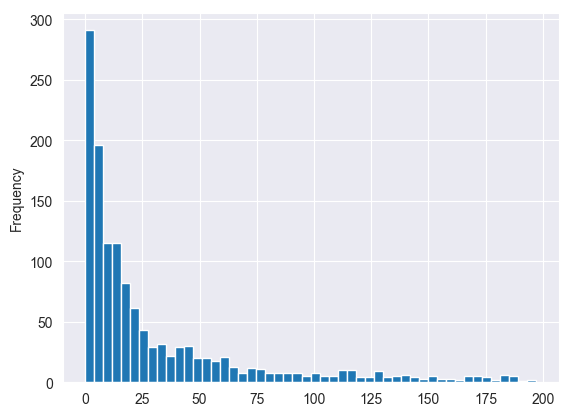

In [210]:
df_details.reviews[df_details.reviews<200].plot.hist(bins = 50);

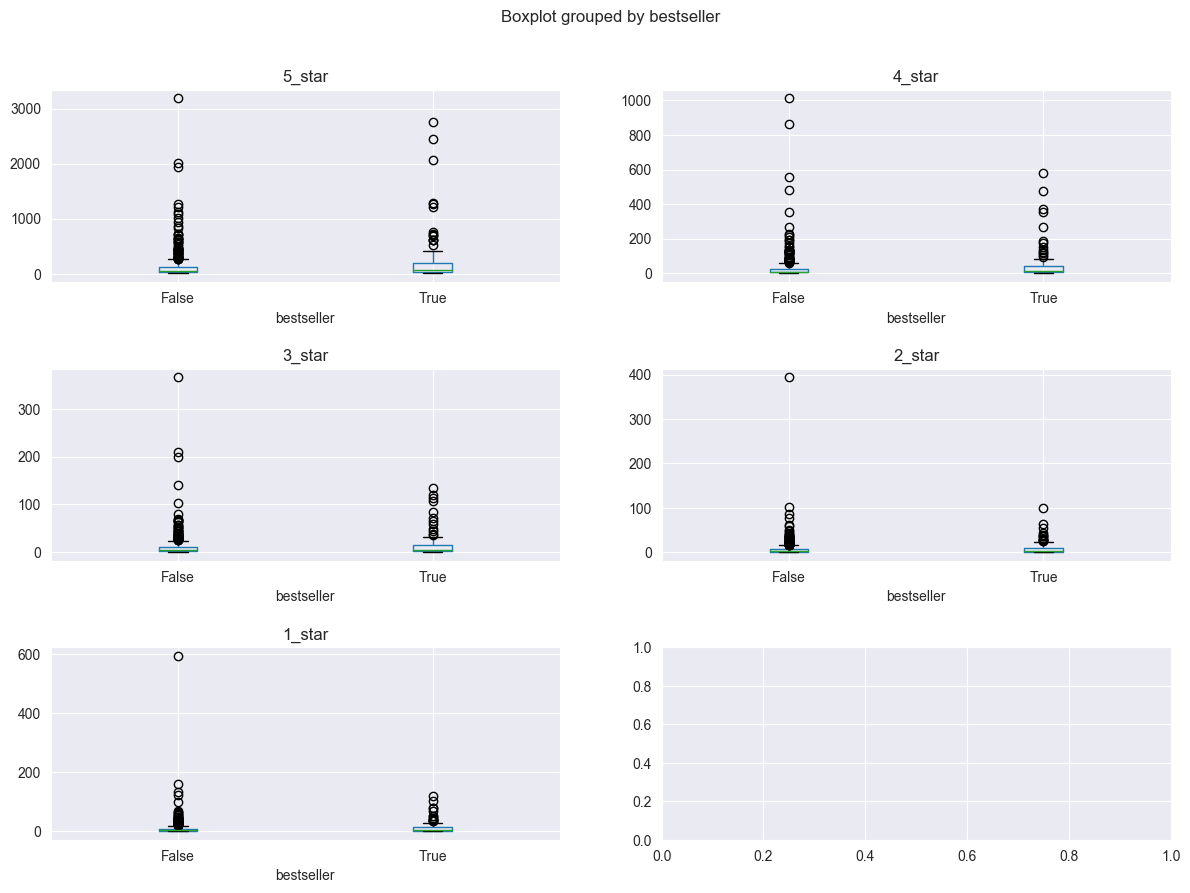

In [211]:
df_details_rating = df_details[df_details.reviews > 20]

f, axes = plt.subplots(3, 2, figsize = (14, 10))
plt.subplots_adjust(hspace = .45)
i, j = 0, 0 
for rating in ratings: 
    if j ==2 or j==4:
        j = 0
        i+=1
    df_details_rating.boxplot(column= rating, by = 'bestseller', ax = axes[i, j])
    j+=1

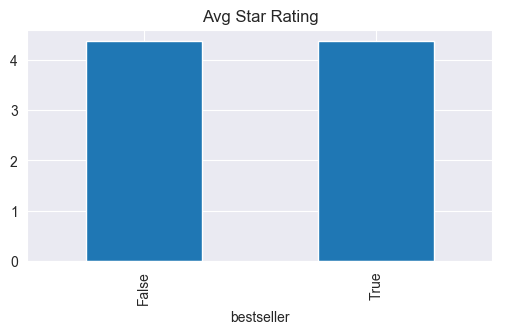

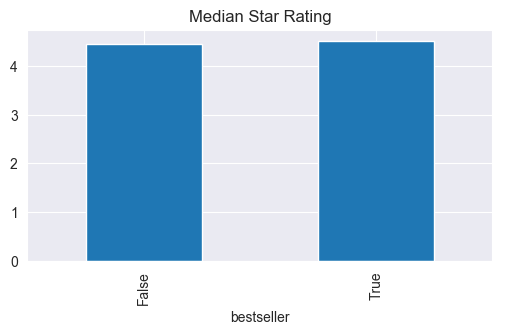

In [212]:
#add column weighted avg star rating
df_details['avg_stars'] = df_details[['5_star','4_star','3_star','2_star',
                                      '1_star']].apply(lambda x: np.dot(x,[5, 4, 3, 2, 1])/sum(x), axis=1)
df_details.groupby(['bestseller']).mean().plot(y=['avg_stars'],kind='bar',
                                               figsize=(6,3), legend = False)

plt.title('Avg Star Rating')

df_details.groupby(['bestseller']).median().plot(y=['avg_stars'],kind='bar',
                                               figsize=(6,3), legend = False)
plt.title('Median Star Rating');

In [213]:
df_details[df_details['5_star'] >1500]

,bestseller,brand,product_name,item_no,5_star,4_star,3_star,2_star,1_star,price,...,spicy|spice,earthy,woody|wood,musk|musky,vanilla,fruit|fruity,sweet,oil,rose,avg_stars
350,False,viktor&rolf,flowerbomb,1377159,3183.0,483.0,140.0,102.0,132.0,165.0,...,1,0,1,0,1,0,1,0,1,4.604703
352,True,yves saint laurent,black opium,1698182,2764.0,578.0,114.0,54.0,51.0,94.0,...,1,0,0,0,1,0,1,0,0,4.670879
358,True,dolce&gabbana,light blue,563320,2060.0,371.0,119.0,63.0,78.0,78.0,...,0,0,1,1,0,0,0,0,1,4.587514
394,False,kat von d,saint eau de parfum,1957216,2015.0,1011.0,199.0,86.0,66.0,85.0,...,0,0,1,1,1,0,1,0,0,4.428191
412,True,pink sugar,pink sugar,796524,2450.0,478.0,135.0,99.0,117.0,30.0,...,0,0,1,1,1,1,0,0,0,4.538579
430,False,lavanila,the healthy deodorant,1174069,1946.0,866.0,366.0,394.0,592.0,14.0,...,0,0,0,0,0,0,0,1,0,3.763689


In [214]:
df_details[df_details['3_star']>300]

,bestseller,brand,product_name,item_no,5_star,4_star,3_star,2_star,1_star,price,...,spicy|spice,earthy,woody|wood,musk|musky,vanilla,fruit|fruity,sweet,oil,rose,avg_stars
430,False,lavanila,the healthy deodorant,1174069,1946.0,866.0,366.0,394.0,592.0,14.0,...,0,0,0,0,0,0,0,1,0,3.763689


In [215]:
df_details[df_details['2_star']>200]

,bestseller,brand,product_name,item_no,5_star,4_star,3_star,2_star,1_star,price,...,spicy|spice,earthy,woody|wood,musk|musky,vanilla,fruit|fruity,sweet,oil,rose,avg_stars
430,False,lavanila,the healthy deodorant,1174069,1946.0,866.0,366.0,394.0,592.0,14.0,...,0,0,0,0,0,0,0,1,0,3.763689


In [216]:
df_details[df_details['1_star']>200]

,bestseller,brand,product_name,item_no,5_star,4_star,3_star,2_star,1_star,price,...,spicy|spice,earthy,woody|wood,musk|musky,vanilla,fruit|fruity,sweet,oil,rose,avg_stars
430,False,lavanila,the healthy deodorant,1174069,1946.0,866.0,366.0,394.0,592.0,14.0,...,0,0,0,0,0,0,0,1,0,3.763689


### Fragrance Loves

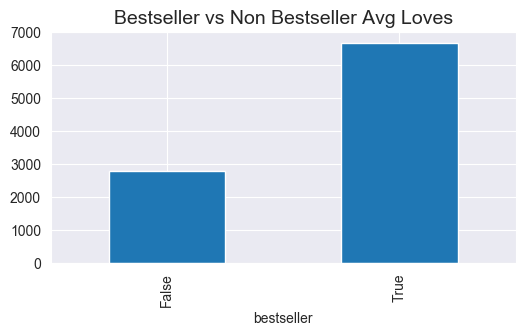

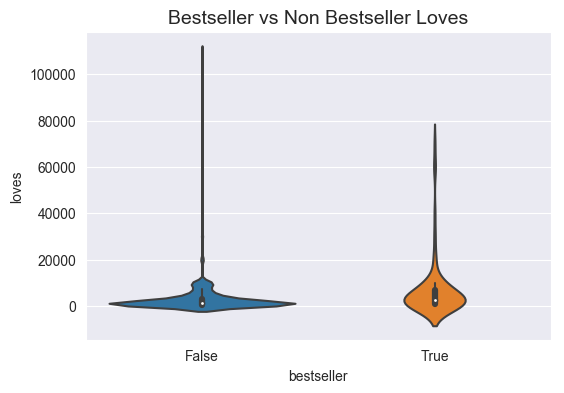

In [217]:
df_details.groupby(['bestseller']).mean().plot(
                                            y=['loves'],
                                            kind='bar', figsize=(6,3), legend = False
)
plt.title('Bestseller vs Non Bestseller Avg Loves', fontsize=14)
plt.show()

plt.figure(figsize=(6,4))
sns.violinplot(x ='bestseller', y='loves', data = df_details)
plt.title('Bestseller vs Non Bestseller Loves', fontsize=14)
plt.show();

### Advertised Price

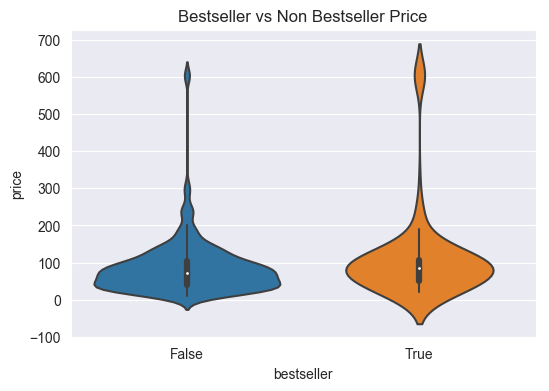

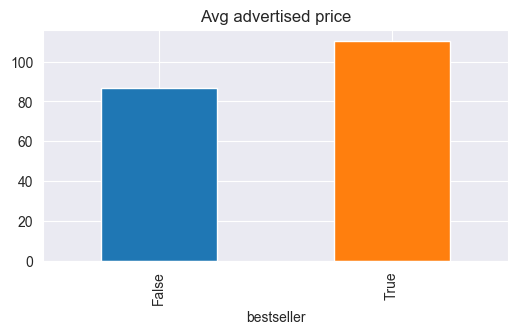

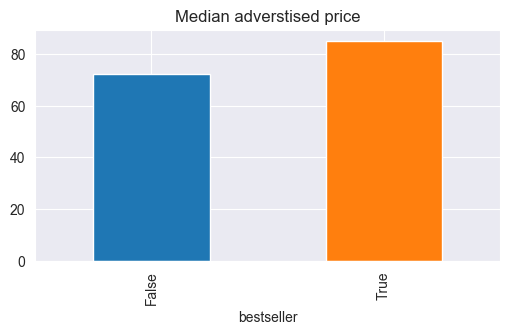

In [218]:
plt.figure(figsize=(6,4))
sns.violinplot(x ='bestseller', y='price', data = df_details)
plt.title('Bestseller vs Non Bestseller Price')
plt.show();

df_details.groupby(['bestseller']).mean().plot(
                                            y= 'price',
                                            kind='bar', figsize=(6,3), legend = False);
plt.title('Avg advertised price');
df_details.groupby(['bestseller']).median().plot(
                                            y= 'price',
                                            kind='bar', figsize=(6,3), legend = False);
plt.title('Median adverstised price');

In [219]:
df_details.price.quantile(.8), df_details.price.quantile(.5), df_details.price.quantile(.25)

(125.0, 75.0, 40.0)

- 75% of fragrances are advertised at or above $40

- 50% of fragrances are advertised at or above $75

- 20% of fragrances are advertised at or above $125

### Advertised oz

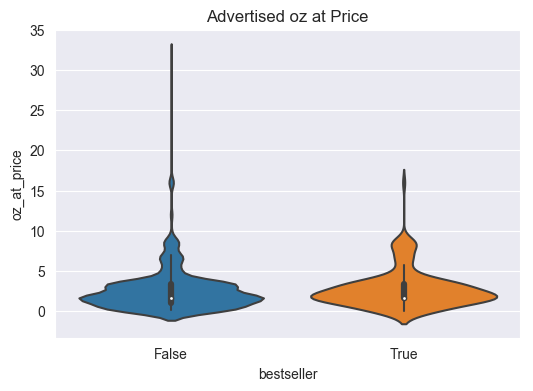

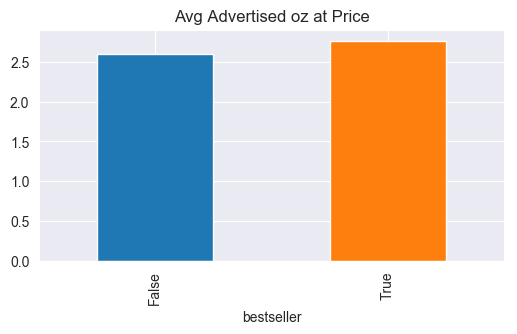

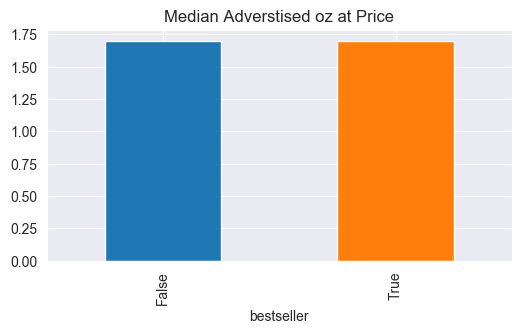

In [220]:
plt.figure(figsize=(6,4))
sns.violinplot(x ='bestseller', y='oz_at_price', data = df_details)
plt.title('Advertised oz at Price')
plt.show();

df_details.groupby(['bestseller']).mean().plot(
                                            y= 'oz_at_price',
                                            kind='bar', figsize=(6,3), legend = False);
plt.title('Avg Advertised oz at Price');
df_details.groupby(['bestseller']).median().plot(
                                            y= 'oz_at_price',
                                            kind='bar', figsize=(6,3), legend = False);
plt.title('Median Adverstised oz at Price');

In [221]:
df_details.oz_at_price.quantile(.8), df_details.oz_at_price.quantile(.5), df_details.oz_at_price.quantile(.25)

(3.4, 1.7, 1.0)


- 80% of  fragrances are advertised at 3.4 or less ounces
- 50% of fragrances are advertised at 1.7 or less ounces


### Price per oz at Advertised Price and oz

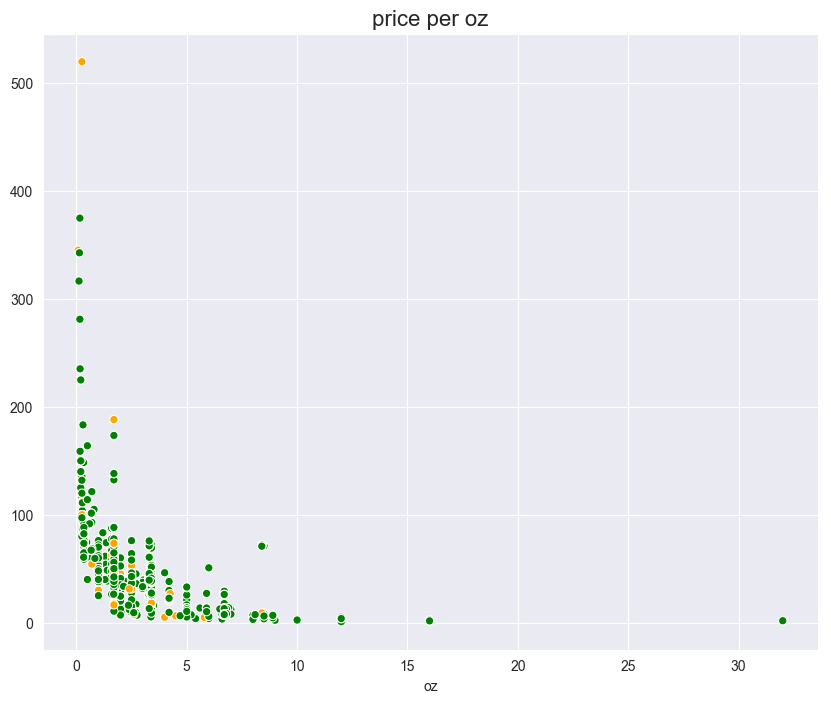

In [222]:
price_per_oz = df_details.price/df_details.oz_at_price
price_per_oz.dropna(inplace=True)

#remove max for better visual
price_per_oz = price_per_oz[price_per_oz != price_per_oz.max()]

df_indexed = df_details.iloc[price_per_oz.index,:]
ozs = df_indexed.oz_at_price
colors = df_indexed.bestseller.apply(lambda x: 'orange' if x is True else 'g')

plt.figure(figsize=(10, 8))
sns.scatterplot(ozs.values, price_per_oz.values, c=colors.values)
plt.title('price per oz', fontsize = 16)
plt.xlabel('oz');

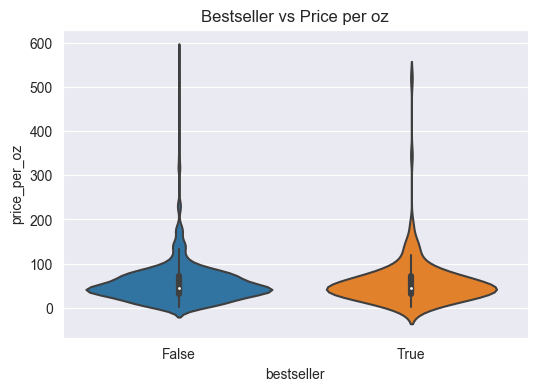

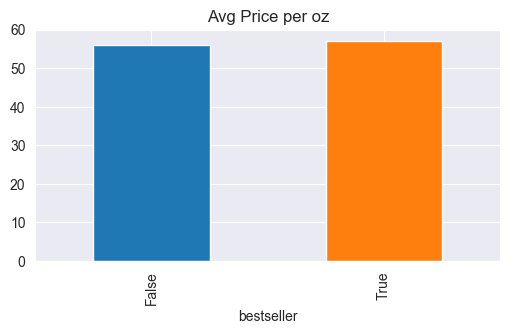

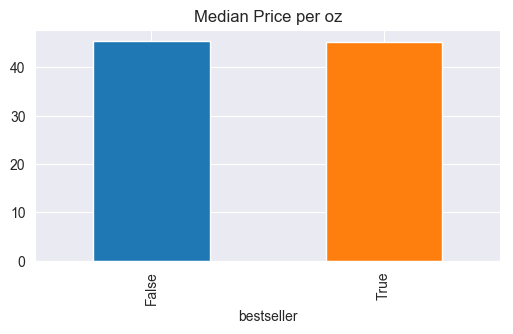

In [223]:
df_details['price_per_oz'] = df_details.price/df_details.oz_at_price

plt.figure(figsize=(6,4))
sns.violinplot(x ='bestseller', y='price_per_oz', data = df_details)
plt.title('Bestseller vs Price per oz')
plt.show()

df_details.groupby(['bestseller']).mean().plot(
                                            y= 'price_per_oz',
                                            kind='bar', figsize=(6,3), legend = False)
plt.title('Avg Price per oz');
df_details.groupby(['bestseller']).median().plot(
                                            y= 'price_per_oz',
                                            kind='bar', figsize=(6,3), legend = False)
plt.title('Median Price per oz');

In [224]:
df_details.price_per_oz.quantile(.8), df_details.price_per_oz.quantile(.5), df_details.price_per_oz.quantile(.25)

(75.75757575757576, 45.45454545454546, 30.58823529411765)

- 75% of fragrances are sold at or above $30 per oz 

### Size Options

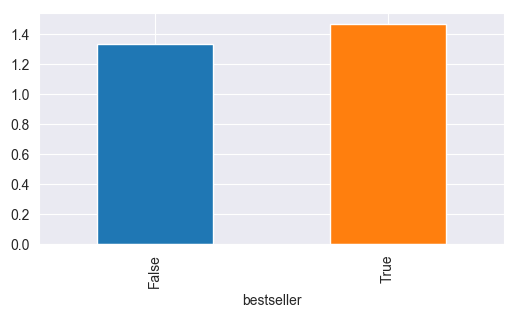

In [225]:
from ast import literal_eval
df_details.options = df_details.options.apply(
                    lambda x: literal_eval(x)if x is not np.nan else x )
df_details['num_options'] = df_details.options.apply(lambda x: len(x) if x is not np.nan else np.nan)
df_details.groupby(['bestseller']).mean().plot(y= 'num_options',
                                            kind='bar', figsize=(6,3), legend = False);

### Scent Descriptors 

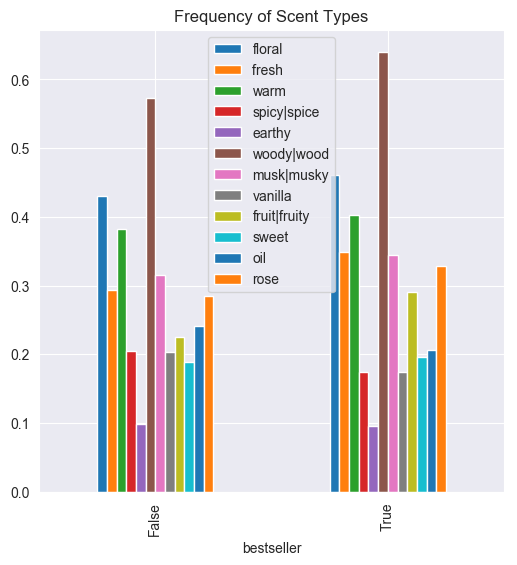

In [226]:

scent_descriptors = ['floral', 'fresh ', 'warm', 'spicy|spice', 'earthy', 'woody|wood', 
                     'musk|musky', 'vanilla', 'fruit|fruity', 'sweet', 'oil', 'rose']


df_details.groupby(['bestseller']).mean().plot(y= scent_descriptors,
                                        kind='bar', figsize=(6,6), stacked=False )
plt.title('Frequency of Scent Types');

- the frequency of wood/woody and fruit/fruity scents is significantly higher in the bestselling fragrances

### Clustering Colors

In [227]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


dominant_colors = df_details.dominant_color.str.strip('()').str.split(',', expand = True)
dominant_colors = dominant_colors.astype(float)
X = dominant_colors

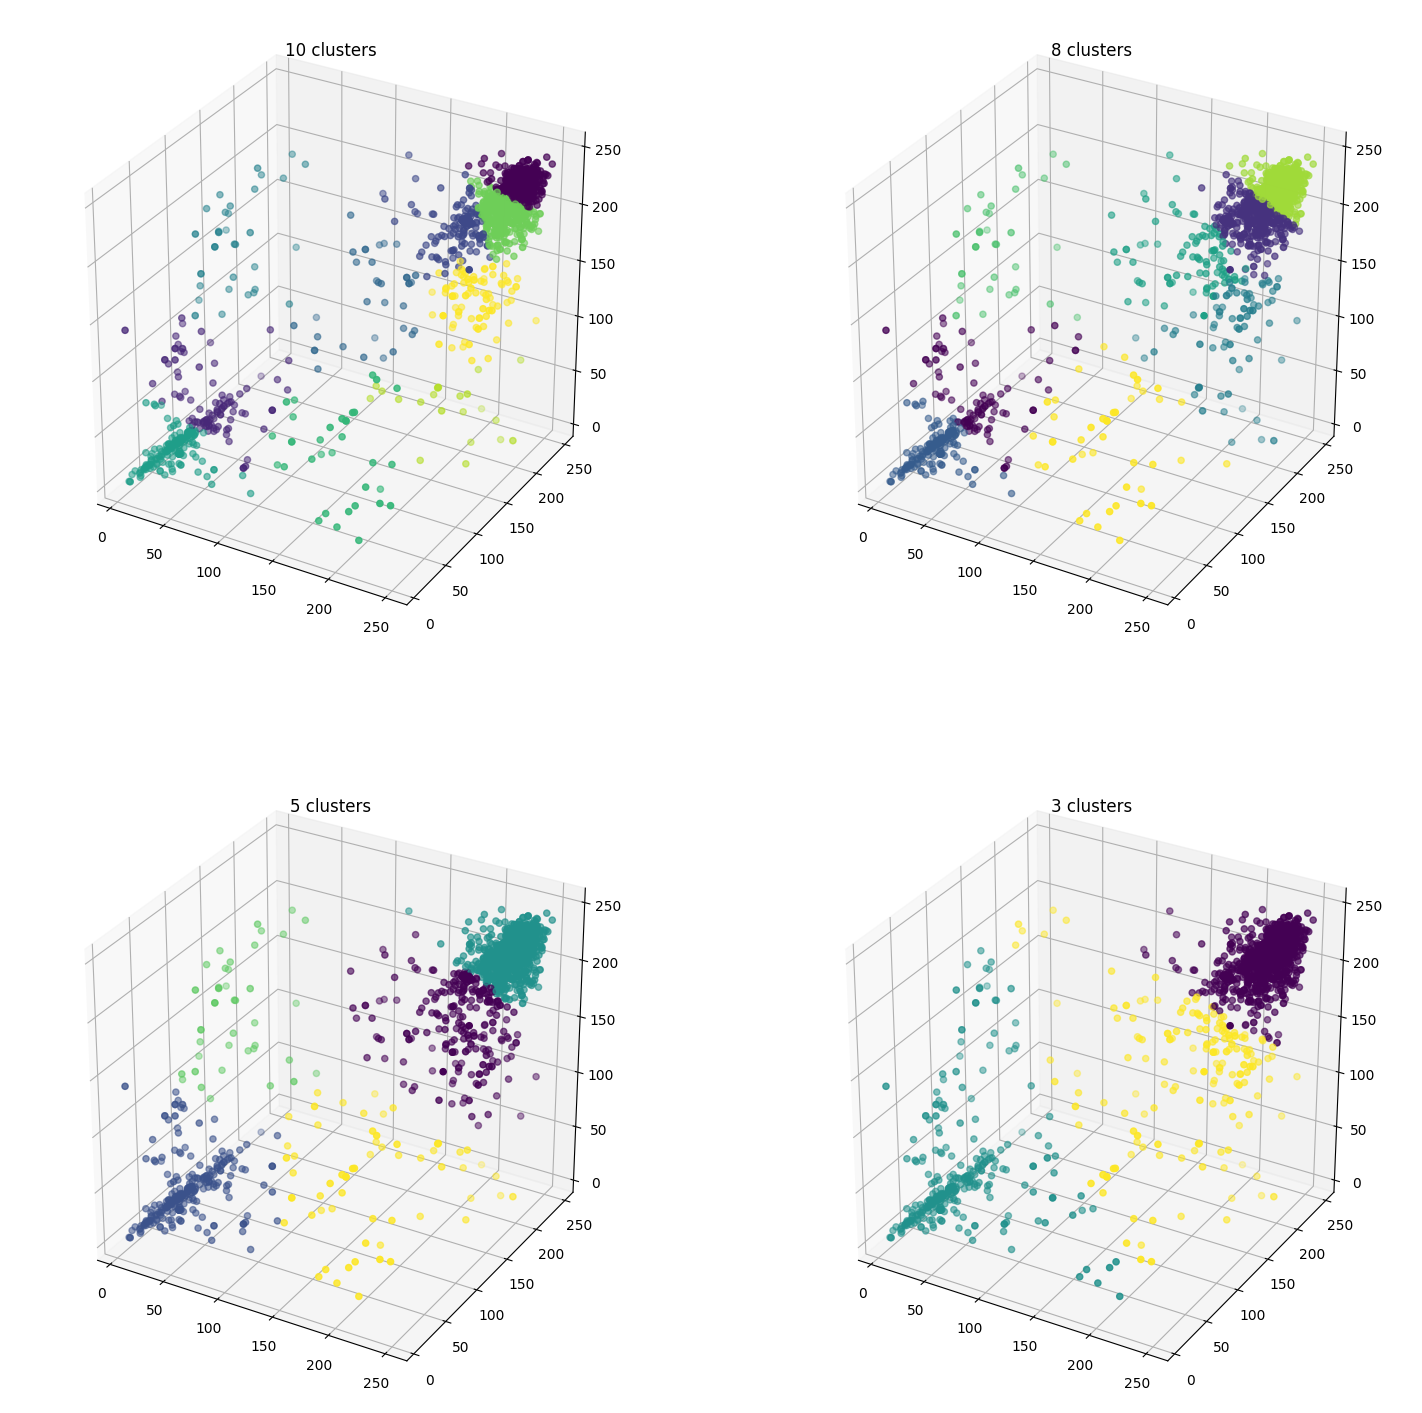

In [228]:
sns.reset_defaults()

estimators = [('k_means_colors_10', KMeans(n_clusters=10)),
              ('k_means_colors_8', KMeans(n_clusters=8)),
              ('k_means_colors_5', KMeans(n_clusters=5)),
              ('k_means_colors_3', KMeans(n_clusters=3)),
              ]

fignum = 1
titles = ['{} clusters'.format(i) for i in [10, 8, 5, 3]]
fig = plt.figure(figsize=(18, 18))
for name, est in estimators:
 
    ax = fig.add_subplot(2, 2, fignum, projection='3d')
    est.fit(X)
    labels = est.labels_

    ax.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, X.iloc[:, 2].values, c=labels)
    plt.title(titles[fignum-1])
    fignum += 1
plt.show()
    

In [229]:
#add color clusters
kmeans = KMeans(n_clusters =50).fit(dominant_colors)
df_details['color_cluster'] = kmeans.labels_

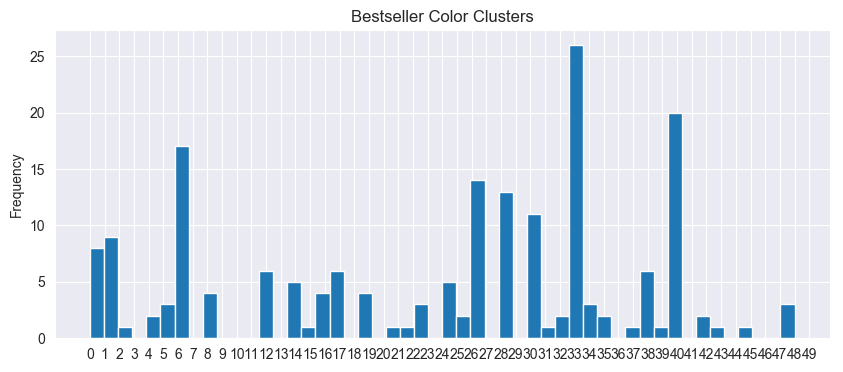

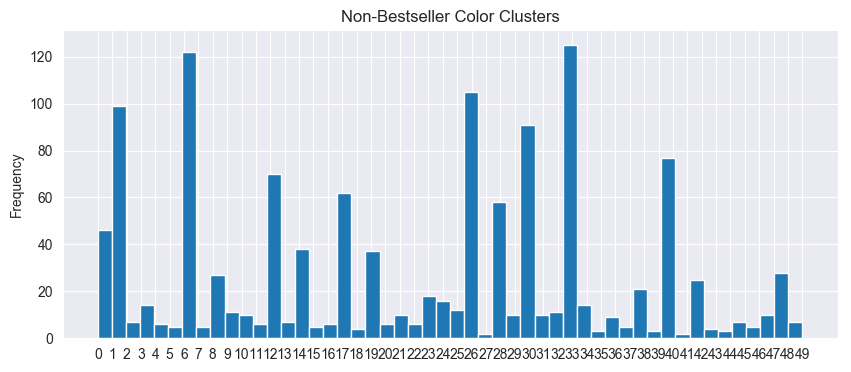

In [230]:
sns.set_style('darkgrid')
df_details[df_details['bestseller']==1].color_cluster.plot.hist(bins=50, xticks = range(0,50), figsize=(10,4))
plt.title('Bestseller Color Clusters')

plt.show()
df_details[df_details['bestseller']==0].color_cluster.plot.hist(bins=50, xticks = range(0,50),figsize=(10,4))
plt.title('Non-Bestseller Color Clusters');

From our visualizations, it is difficult to determine how well defined our clusters are. The human eye can detect millions of different colors however we will assume that there are relatively few colors used in fragrances. Furthermore, we will assume that only a few shades of each color are significant enough differences to potentially influence purchasing habits. We will use color clusters in our classification model, and utilize feature importance to determine the usefulness of these color clusters.

### Frequency of Bestseller by Brand 

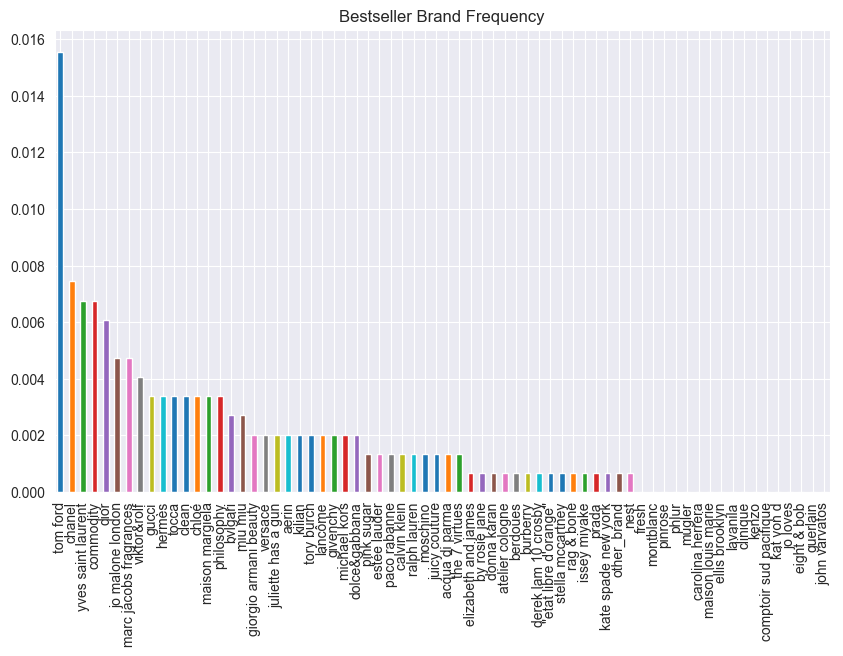

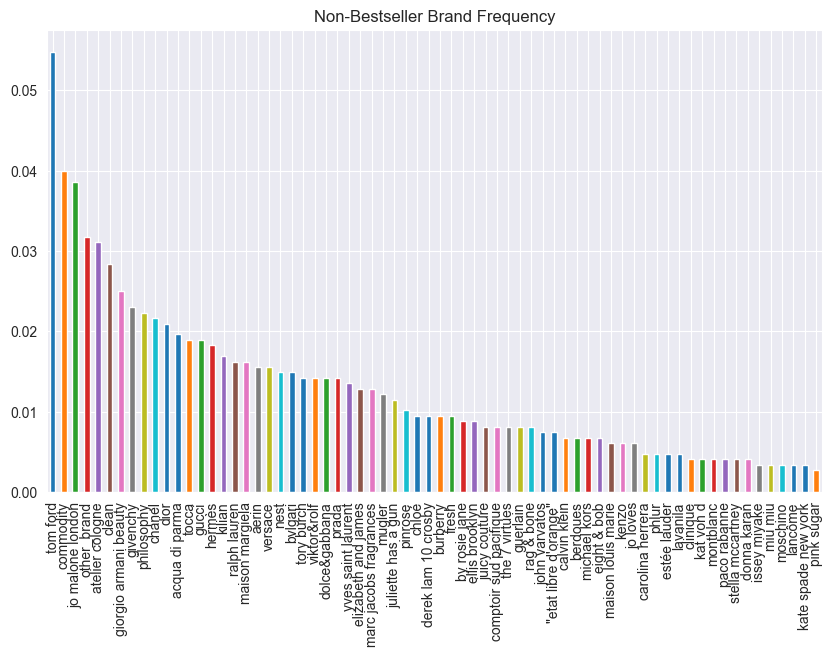

In [231]:
df_brand = pd.concat([pd.get_dummies(df_details.brand), df_details.bestseller], axis=1)
#df_brand[df_brand.sum()<8]

bestseller_brand = df_brand[df_brand.bestseller==1].sum(axis=0)/df_brand.shape[0]
non_bestseller_brand = df_brand[df_brand.bestseller==0].sum(axis=0)/df_brand.shape[0]

bestseller_brand.drop('bestseller').sort_values(ascending=False).plot.bar(figsize =(10,6))
plt.title('Bestseller Brand Frequency')
plt.show()
non_bestseller_brand.drop('bestseller').sort_values(ascending=False).plot.bar(figsize =(10,6))
plt.title('Non-Bestseller Brand Frequency');

Here we see an interesting pattern emerge among bestselling fragrances. After the first 5-8 most frequent bestsellers we see that many brands are achieving the exact same number of bestsellers. Among the non-bestsellers we see more variety of frequency as we would expect. 

This may indicate that Sephora is actually 'choosing' its best selling fragrances for brands they promote, such as limited advertising slots driving bestselling fragrances. 